In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dict_metrics={}
years=range(1995, 2020)

In [3]:
for year in years:
    with open(f'metrics/{year}_metrics.json') as json_file:
        dict_metrics[year] = json.load(json_file)

In [4]:
dict_metrics_cleaned={}
partidos_all=[]
ideologias_all=[]
dict_metrics_cleaned['ideologias']={}
dict_metrics_cleaned['partidos']={}

for year in years:
    for ideology in dict_metrics[year]['shortest_paths_ideology'][0]:
        if ideology not in ideologias_all:
            ideologias_all.append(ideology)
            dict_metrics_cleaned['ideologias'][ideology]={}
            dict_metrics_cleaned['ideologias'][ideology]['years']=[]
            dict_metrics_cleaned['ideologias'][ideology]['fragmentation']=[]
            dict_metrics_cleaned['ideologias'][ideology]['isolation']=[]
    
    for party in dict_metrics[year]['shortest_paths_pps'][0]:
        if party not in partidos_all:
            partidos_all.append(party)
            dict_metrics_cleaned['partidos'][party]={}
            dict_metrics_cleaned['partidos'][party]['years']=[]
            dict_metrics_cleaned['partidos'][party]['fragmentation']=[]
            dict_metrics_cleaned['partidos'][party]['isolation']=[]


In [5]:
def isolation(entity,year,dict_metrics, parties = False):
    if parties == True:
        param = 'shortest_paths_pps'
    else: 
        param = 'shortest_paths_ideology'
        
    fragmentation=dict_metrics[year][param][0][entity][entity][1]
    return fragmentation

def fragmentation(entity1,year,dict_metrics, parties = False):
    if parties == True:
        param = 'shortest_paths_pps'
    else: 
        param = 'shortest_paths_ideology'
    distance_list=[]
    for entity2 in dict_metrics[year][param][0]:
        if entity1!=entity2:
                distance_list.append(dict_metrics[year][param][0][entity1][entity2][1])
    cleanedList = [x for x in distance_list if str(x) != 'nan'] 
    isolation=np.mean(cleanedList)
    return isolation
        

In [6]:
#{ideologia:{years:[],fragmentation:[], isolation:[]]}}

In [7]:
for year in years:
    for ideology in ideologias_all:
        if ideology in dict_metrics[year]['shortest_paths_ideology'][0]:
            dict_metrics_cleaned['ideologias'][ideology]['years'].append(year)
            dict_metrics_cleaned['ideologias'][ideology]['fragmentation'].append(fragmentation(ideology,year,dict_metrics))
            dict_metrics_cleaned['ideologias'][ideology]['isolation'].append(isolation(ideology,year,dict_metrics))
                    
    for party in partidos_all:
        if party in dict_metrics[year]['shortest_paths_pps'][0]:
            dict_metrics_cleaned['partidos'][party]['years'].append(year)
            dict_metrics_cleaned['partidos'][party]['fragmentation'].append(fragmentation(party,year,dict_metrics, parties =True))
            dict_metrics_cleaned['partidos'][party]['isolation'].append(isolation(party,year,dict_metrics, parties =True))
       

/home/carolina/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/carolina/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


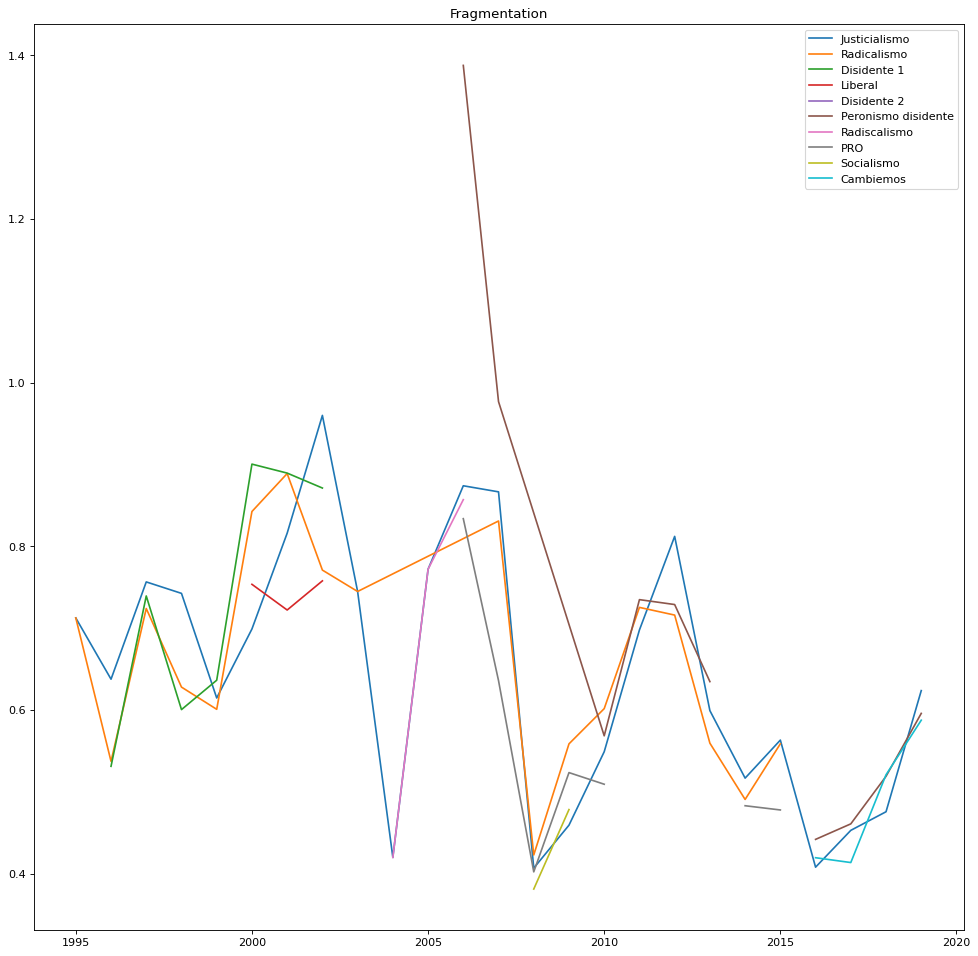

In [8]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

for ideology in  dict_metrics_cleaned['ideologias']:
    plt.plot(dict_metrics_cleaned['ideologias'][ideology]['years'],dict_metrics_cleaned['ideologias'][ideology]['fragmentation'],label=ideology)
plt.legend()
plt.title('Fragmentation')
plt.savefig('../figs/Fragmentation.png',dpi=100)   # save the figure to file

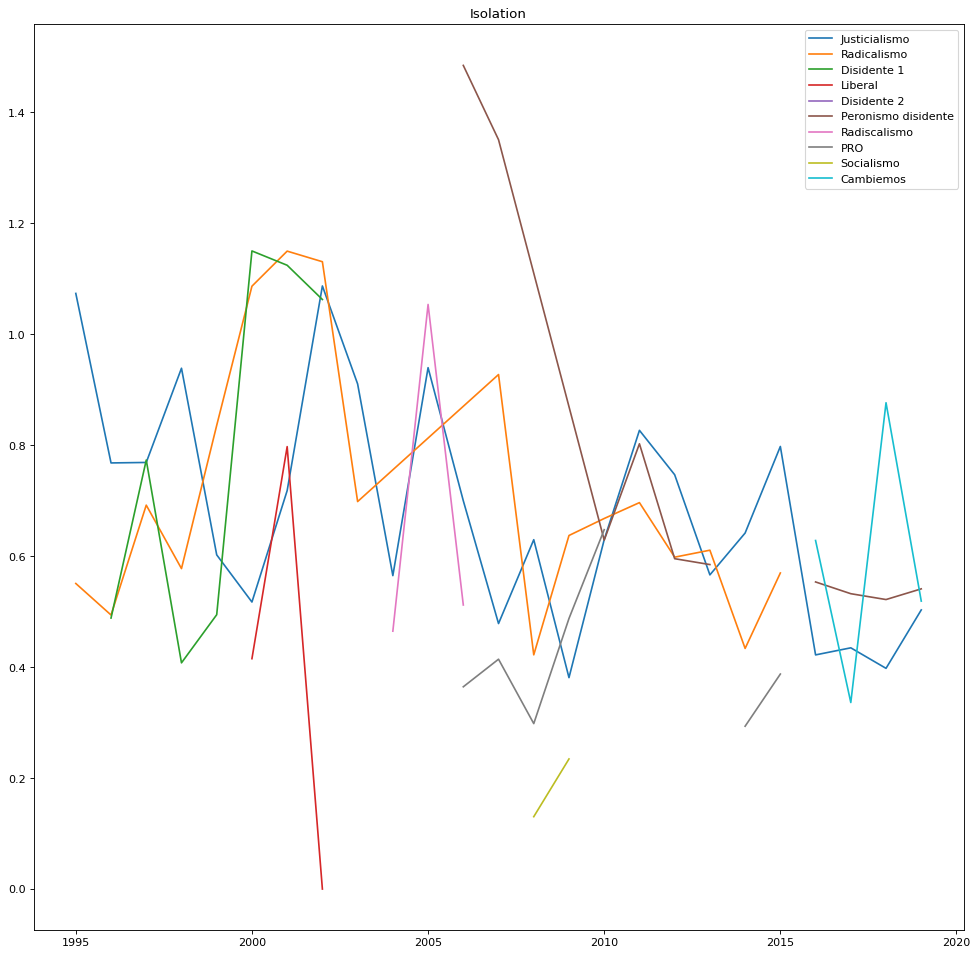

In [9]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

for ideology in  dict_metrics_cleaned['ideologias']:
    plt.plot(dict_metrics_cleaned['ideologias'][ideology]['years'],dict_metrics_cleaned['ideologias'][ideology]['isolation'],label=ideology)
plt.legend()
plt.title('Isolation')
plt.savefig('../figs/Isolation.png',dpi=100)   # save the figure to file
